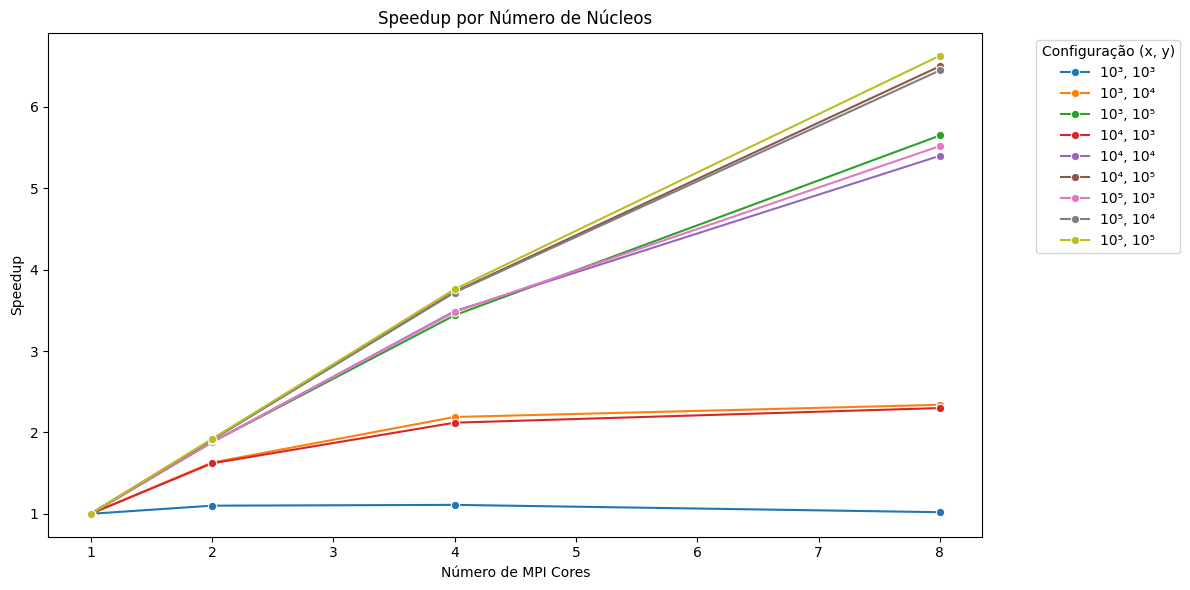

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Dados do trabalho
mpi_cores = [1, 2, 4, 8]
configs = [
    "10³, 10³", "10³, 10⁴", "10³, 10⁵",
    "10⁴, 10³", "10⁴, 10⁴", "10⁴, 10⁵",
    "10⁵, 10³", "10⁵, 10⁴", "10⁵, 10⁵"
]
execution_times = [
    [0.117, 0.106, 0.105, 0.114], [0.445, 0.272, 0.203, 0.190], [3.819, 2.022, 1.107, 0.675],
    [0.452, 0.278, 0.213, 0.196], [3.788, 2.008, 1.085, 0.701], [37.120, 19.347, 9.949, 5.709],
    [3.779, 2.010, 1.084, 0.684], [37.031, 19.326, 9.949, 5.741], [370.292, 192.715, 98.438, 55.789]
]
speedups = [
    [1.0, 1.10, 1.11, 1.02], [1.0, 1.63, 2.19, 2.34], [1.0, 1.88, 3.44, 5.65],
    [1.0, 1.62, 2.12, 2.30], [1.0, 1.88, 3.49, 5.40], [1.0, 1.91, 3.73, 6.50],
    [1.0, 1.88, 3.48, 5.52], [1.0, 1.91, 3.72, 6.45], [1.0, 1.92, 3.76, 6.63]
]

# Preparar dados para o gráfico de tempos de execução
time_data = []
for config, times in zip(configs, execution_times):
    for cores, time in zip(mpi_cores, times):
        time_data.append({"Config": config, "MPI Cores": cores, "Execution Time (s)": time})

# Preparar dados para o gráfico de speedup
speedup_data = []
for config, sups in zip(configs, speedups):
    for cores, speedup in zip(mpi_cores, sups):
        speedup_data.append({"Config": config, "MPI Cores": cores, "Speedup": speedup})

# Criar dataframes
time_df = pd.DataFrame(time_data)
speedup_df = pd.DataFrame(speedup_data)

# Gráfico de Speedup
plt.figure(figsize=(12, 6))
sns.lineplot(data=speedup_df, x="MPI Cores", y="Speedup", hue="Config", marker="o")
plt.title("Speedup por Número de Núcleos")
plt.xlabel("Número de MPI Cores")
plt.ylabel("Speedup")
plt.legend(title="Configuração (x, y)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


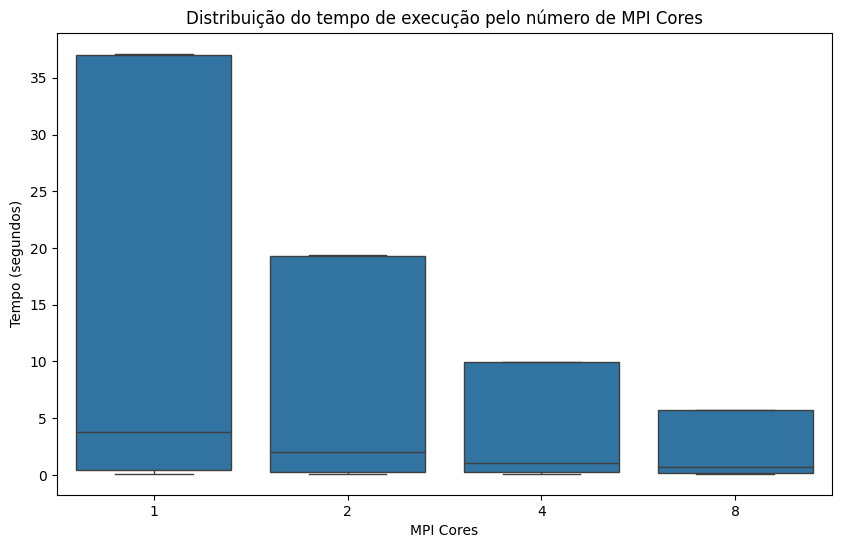

In [7]:
data = {
    'cores': [1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8, 8, 8, 8, 8, 8, 8, 8, 8],
    'x': [1000, 1000, 1000, 10000, 10000, 10000, 100000, 100000, 100000,1000, 1000, 1000, 10000, 10000, 10000, 100000, 100000, 100000,1000, 1000, 1000, 10000, 10000, 10000, 100000, 100000, 100000,1000, 1000, 1000, 10000, 10000, 10000, 100000, 100000, 100000],
    'y': [1000, 10000, 100000, 1000, 10000, 100000, 1000, 10000, 100000,1000, 10000, 100000, 1000, 10000, 100000, 1000, 10000, 100000,1000, 10000, 100000, 1000, 10000, 100000, 1000, 10000, 100000,1000, 10000, 100000, 1000, 10000, 100000, 1000, 10000, 100000],
    'real_time': [0.117, 0.445, 3.819, 0.452, 3.788, 37.120, 3.779, 37.031, 370.292, 0.106, 0.272, 2.022, 0.278, 2.008, 19.347, 2.010, 19.326, 192.715, 0.105, 0.203, 1.107, 0.213, 1.085, 9.949, 1.084, 9.949, 98.438, 0.114, 0.190, 0.675, 0.196, 0.701, 5.709, 0.684, 5.741, 55.789 ]
}
df = pd.DataFrame(data)
plt.figure(figsize=(10,6))
bp = sns.boxplot(x='cores', y='real_time', data=df, showfliers=False)
bp.set(ylabel="Tempo (segundos)", xlabel="MPI Cores")
plt.title('Distribuição do tempo de execução pelo número de MPI Cores')
plt.show()

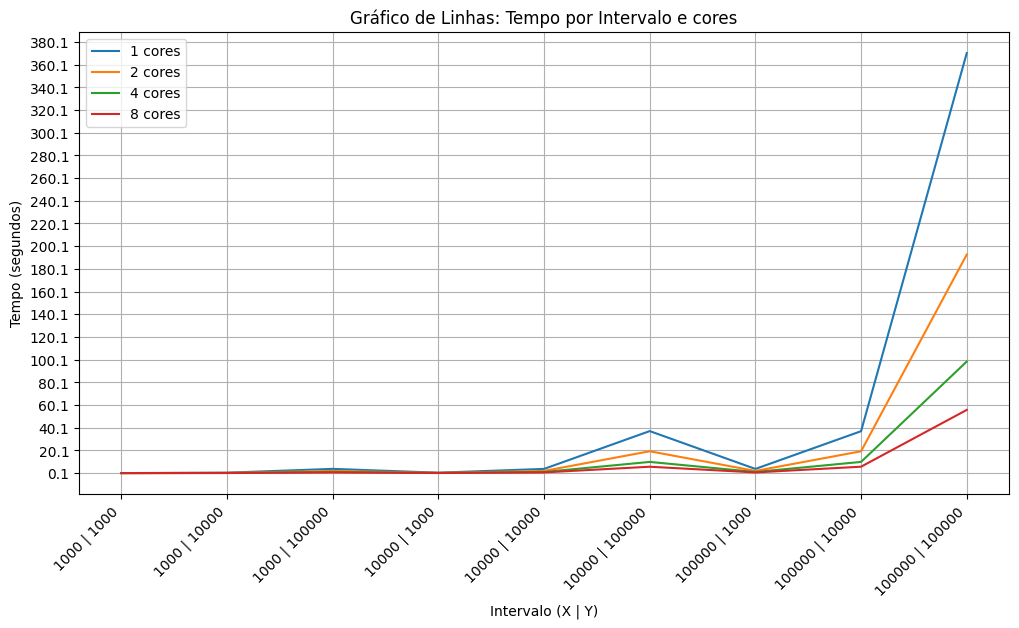

In [13]:
# Criando rótulos para o eixo X
df['intervalo'] = df['x'].astype(str) + ' | ' + df['y'].astype(str)

# Criando o gráfico de linhas
plt.figure(figsize=(12, 6))
for core in df['cores'].unique():
    df_thread = df[df['cores'] == core]
    plt.plot(df_thread['intervalo'], df_thread['real_time'], label=f'{core} cores')

# Configurando o gráfico
plt.title('Gráfico de Linhas: Tempo por Intervalo e cores')
plt.xlabel('Intervalo (X | Y)')
plt.ylabel('Tempo (segundos)')
plt.xticks(rotation=45, ha='right')  # Rotacionando os rótulos do eixo X

# Definindo os ticks do eixo Y manualmente com np.arange()
min_time = df['real_time'].min()
max_time = df['real_time'].max()
plt.yticks(np.arange(min_time, max_time + 10, 20))  # Cria ticks de 10 em 10

plt.legend(loc='best')  # Adicionando legenda
plt.grid(True)  # Adicionando grade

plt.show
plt.savefig('grafico_linhas.png')